In [2]:
from PIL import Image
from vangogh.evolution import Evolution
from vangogh.fitness import draw_voronoi_image
from vangogh.util import IMAGE_SHRINK_SCALE, REFERENCE_IMAGE, NUM_VARIABLES_PER_POINT
from IPython.display import display, clear_output
from vangogh.experiment_module.experiment import Experiment
from vangogh.experiment_module.experiment import compare_experiments
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('classic')
%matplotlib inline

from multiprocess import Pool, cpu_count

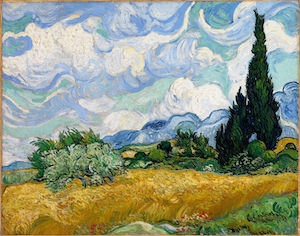

In [2]:
display(REFERENCE_IMAGE)

In [3]:
# Enable to show live rendering of best individual during optimization
display_output = False
# Enable to save progress images at every 50th generation
save_progress = True
# Enable to print verbose output per generation
verbose_output = True

In [4]:

import os, os.path
def reporter(time, evo):
    if save_progress or display_output:
        elite = draw_voronoi_image(evo.elite, evo.reference_image.width, evo.reference_image.height, scale=IMAGE_SHRINK_SCALE)


    if display_output:
        clear_output()
        display(elite)
    if save_progress and time["num-generations"] % 100 == 0:
        elite.save(f"./img/van_gogh_experiment_{evo.seed}_{evo.population_size}_{evo.crossover_method}_{evo.num_points}_{evo.initialization}_{evo.generation_budget}_{time['num-generations']:05d}_{len(os.listdir('.'))}.png")

def run_algorithm(evo):
    start = time()
    
    data = []
    data = evo.run()
    time_spent = time() - start
    #print(f"Done: run {seed} - pop {population_size} - crossover {crossover_method} - num. points {num_points} - initialization {initialization} - in {int(time_spent)} seconds")
    return data

## Running a single instance

In [5]:
%%time
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="PFDA",
                population_size=500,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=0,
                initialization="RANDOM",
                generation_budget=100,
                num_features_mutation_strength=.25,
                selection_name='tournament_4',
                verbose=verbose_output)
                
exp = Experiment('PFDA', evo)
#exp.run_experiment(repeats=1, plot_converge=True, mode="generation")

CPU times: user 4.4 ms, sys: 0 ns, total: 4.4 ms
Wall time: 3.29 ms


In [6]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="PFDA_xyrgb",
                population_size=300,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=500,
                num_features_mutation_strength=.25,
                selection_name='tournament_4',
                verbose=verbose_output)

experiment_pfda = Experiment("PFDA", evo)

pfda_results = experiment_pfda.run_experiment(repeats=1, plot_converge=True, mode="generation")

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FE2051A25C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fe2051d43a0>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 132358 avg. fitness: 145197.41333333333
generation: 2 best fitness: 125072 avg. fitness: 139764.63333333333
generation: 3 best fitness: 123823 avg. fitness: 134871.30666666667
generation: 4 best fitness: 119507 avg. fitness: 130600.57
generation: 5 best fitness: 112520 avg. fitness: 126652.896666666

KeyboardInterrupt: 

Running new experiment: PFDA_mutation_probability_0.002_num_features_mutation_strength_0.25_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 132358 avg. fitness: 145197.41333333333
generation: 2 best fitness: 125072 avg. fitness: 139764.63333333333
generation: 3 best fitness: 123823 avg. fitness: 134871.30666666667
generation: 4 best fitness: 11

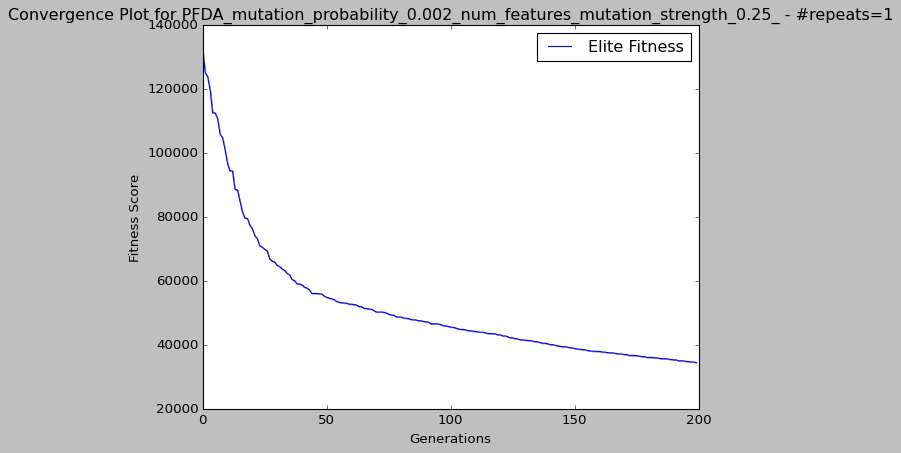

Running new experiment: PFDA_mutation_probability_0.002_num_features_mutation_strength_0.5_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.5
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 128638 avg. fitness: 144033.43666666668
generation: 2 best fitness: 124565 avg. fitness: 138657.47333333333
generation: 3 best fitness: 124565 avg. fitness: 133680.96333333335
generation: 4 best fitness: 1221

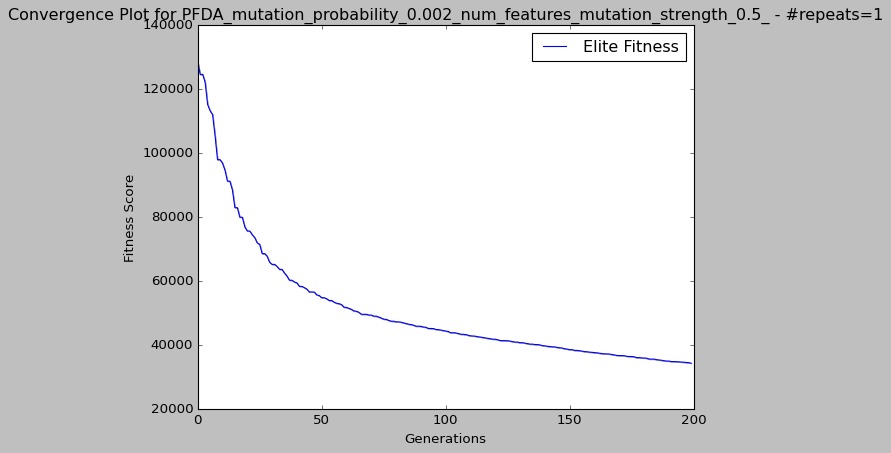

Running new experiment: PFDA_mutation_probability_0.002_num_features_mutation_strength_0.75_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.75
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 129512 avg. fitness: 144566.97666666665
generation: 2 best fitness: 129142 avg. fitness: 139689.67666666667
generation: 3 best fitness: 122986 avg. fitness: 135111.35333333333
generation: 4 best fitness: 12

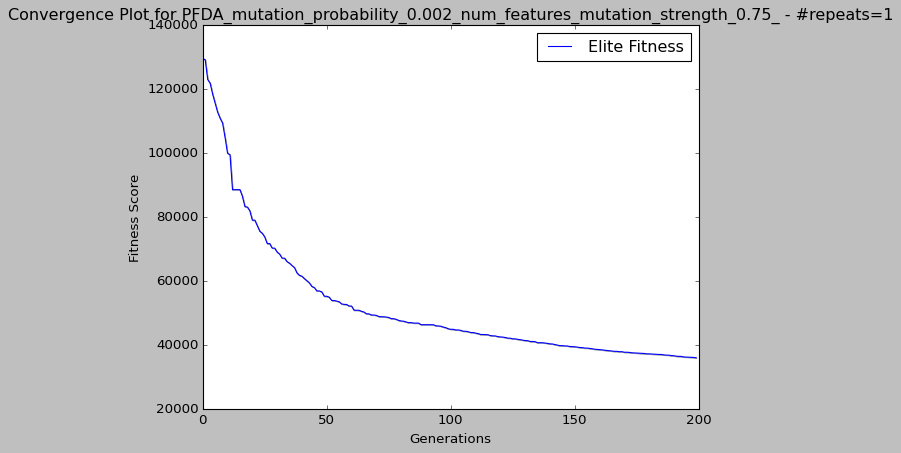

Running new experiment: PFDA_mutation_probability_0.004_num_features_mutation_strength_0.25_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 130338 avg. fitness: 145122.43
generation: 2 best fitness: 128179 avg. fitness: 139935.71333333335
generation: 3 best fitness: 126047 avg. fitness: 135530.91
generation: 4 best fitness: 121138 avg. fitness:

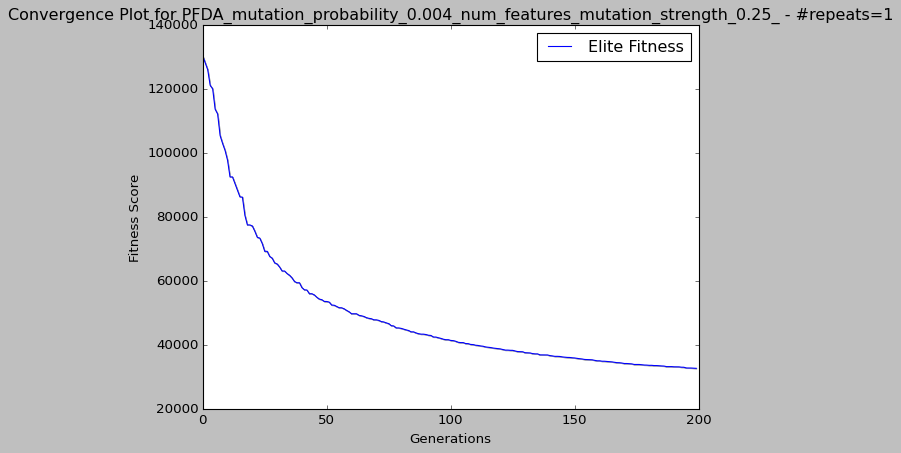

Running new experiment: PFDA_mutation_probability_0.004_num_features_mutation_strength_0.5_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.5
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 125971 avg. fitness: 144421.02666666667
generation: 2 best fitness: 125971 avg. fitness: 139409.03666666665
generation: 3 best fitness: 125971 avg. fitness: 135490.71
generation: 4 best fitness: 120413 avg. f

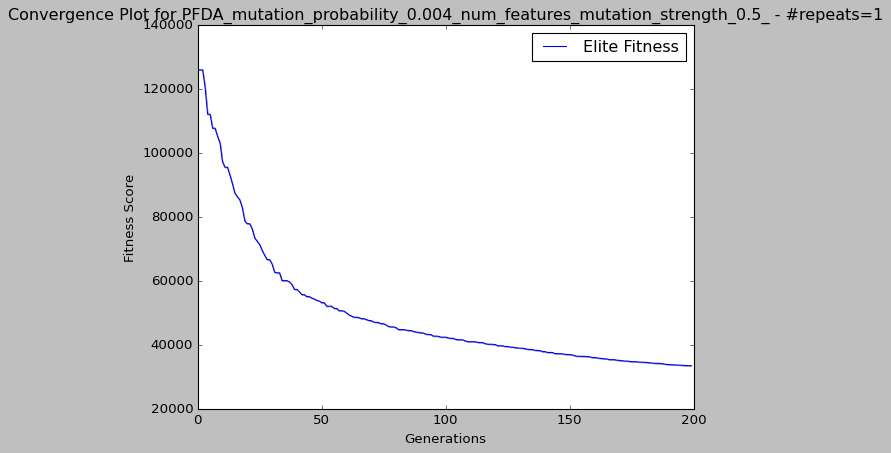

Running new experiment: PFDA_mutation_probability_0.004_num_features_mutation_strength_0.75_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.75
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 131467 avg. fitness: 144571.26333333334
generation: 2 best fitness: 125884 avg. fitness: 139384.72
generation: 3 best fitness: 122011 avg. fitness: 134535.72
generation: 4 best fitness: 120398 avg. fitness:

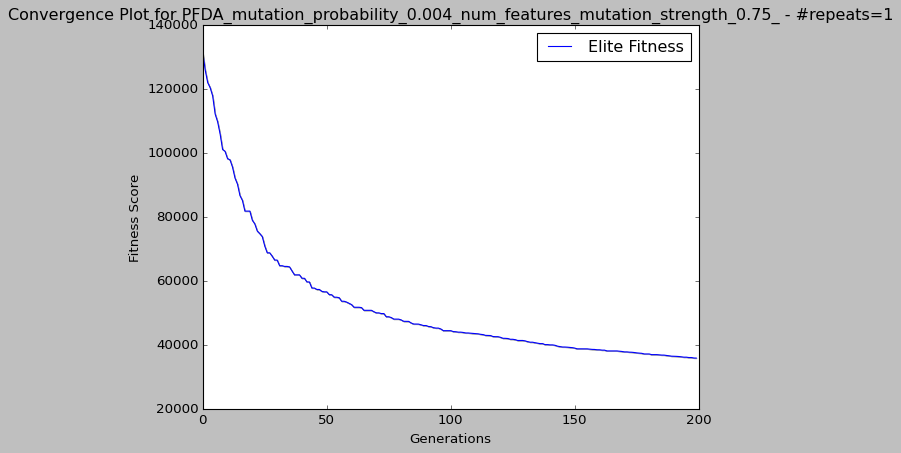

Running new experiment: PFDA_mutation_probability_0.01_num_features_mutation_strength_0.25_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.01
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 131330 avg. fitness: 145082.68333333332
generation: 2 best fitness: 128106 avg. fitness: 139739.17666666667
generation: 3 best fitness: 124506 avg. fitness: 135453.37333333332
generation: 4 best fitness: 1210

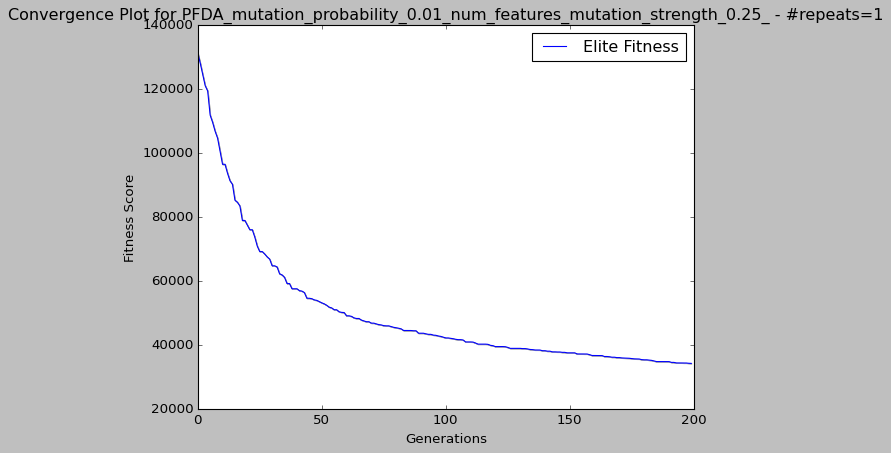

Running new experiment: PFDA_mutation_probability_0.01_num_features_mutation_strength_0.5_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.01
 - Num Features Mutation Strength: 0.5
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 131211 avg. fitness: 144499.51333333334
generation: 2 best fitness: 130599 avg. fitness: 139438.24333333335
generation: 3 best fitness: 123296 avg. fitness: 135373.85
generation: 4 best fitness: 116311 avg. fit

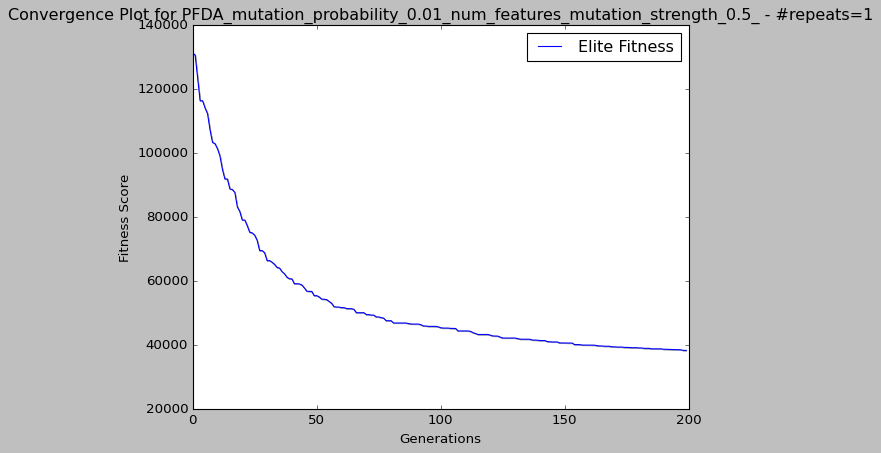

Running new experiment: PFDA_mutation_probability_0.01_num_features_mutation_strength_0.75_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.01
 - Num Features Mutation Strength: 0.75
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 130902 avg. fitness: 144620.60666666666
generation: 2 best fitness: 126117 avg. fitness: 139829.51
generation: 3 best fitness: 124913 avg. fitness: 135139.82666666666
generation: 4 best fitness: 122043 avg. f

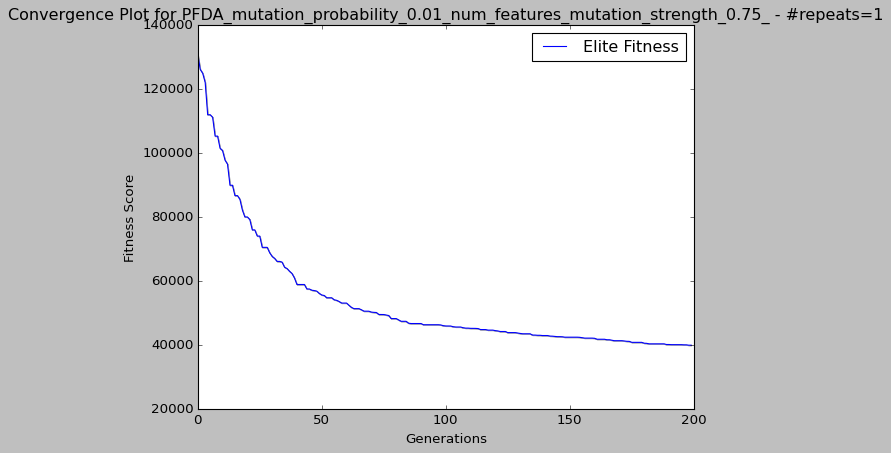

Running new experiment: PFDA_mutation_probability_0.02_num_features_mutation_strength_0.25_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.02
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 128901 avg. fitness: 144774.67666666667
generation: 2 best fitness: 128901 avg. fitness: 139514.79666666666
generation: 3 best fitness: 125862 avg. fitness: 135412.75666666665
generation: 4 best fitness: 1208

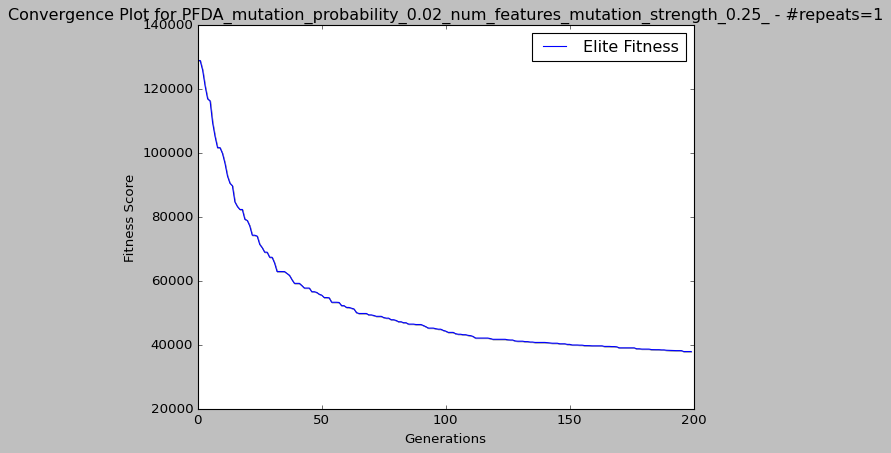

Running new experiment: PFDA_mutation_probability_0.02_num_features_mutation_strength_0.5_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.02
 - Num Features Mutation Strength: 0.5
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 132949 avg. fitness: 145659.33
generation: 2 best fitness: 128515 avg. fitness: 140389.26
generation: 3 best fitness: 126849 avg. fitness: 136156.72666666665
generation: 4 best fitness: 122546 avg. fitness: 132

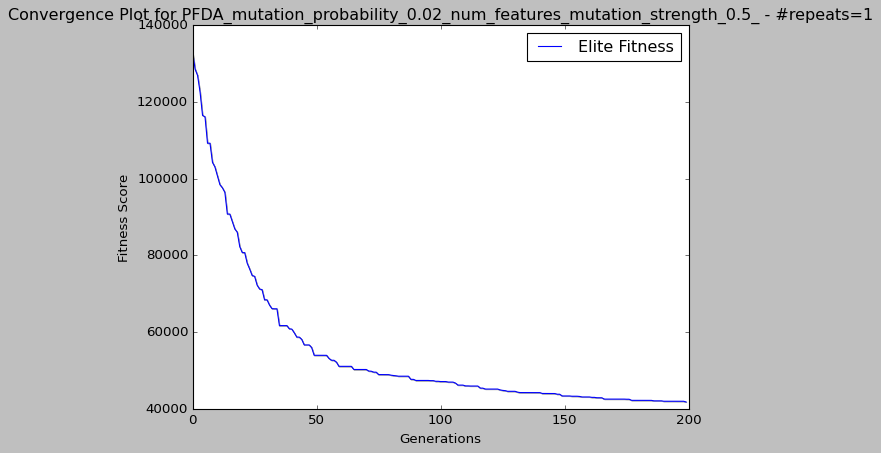

Running new experiment: PFDA_mutation_probability_0.02_num_features_mutation_strength_0.75_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7EFD28F01660>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.02
 - Num Features Mutation Strength: 0.75
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7efcfa30c280>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 133872 avg. fitness: 144930.64666666667
generation: 2 best fitness: 127871 avg. fitness: 140068.44
generation: 3 best fitness: 125888 avg. fitness: 135638.55666666667
generation: 4 best fitness: 118857 avg. f

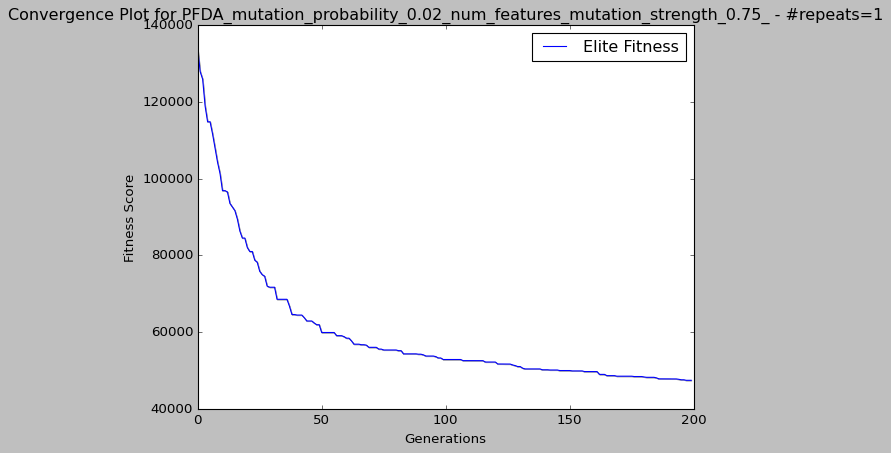

Best hyperparameters found: PFDA_mutation_probability_0.004_num_features_mutation_strength_0.25_ with score 32706.0


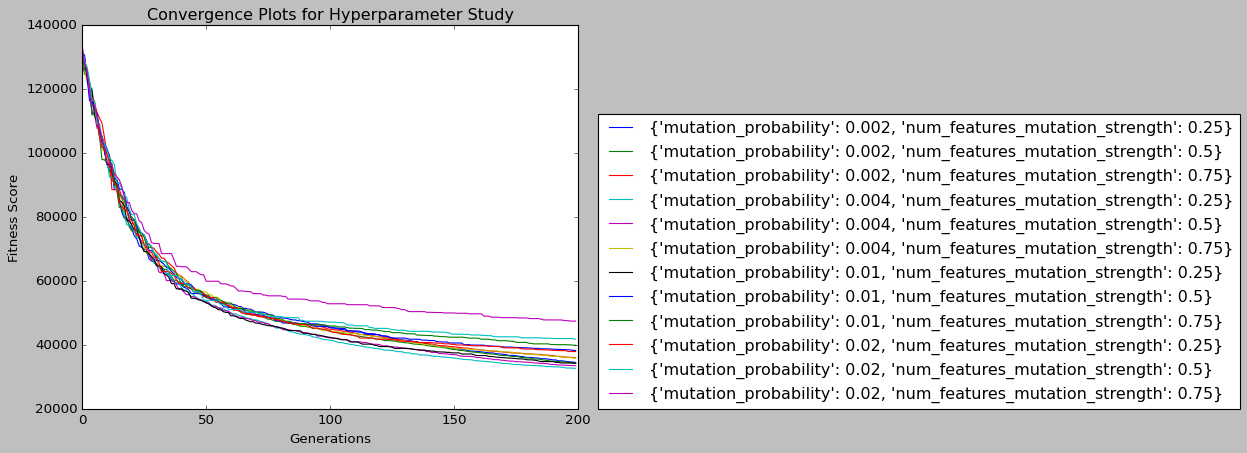

In [ ]:
num_points = 100
num_individuals = 300
evo = Evolution(num_points,
                REFERENCE_IMAGE,
                evolution_type="PFDA_xyrgb",
                population_size=num_individuals,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=200,
                num_features_mutation_strength=.25,
                selection_name='tournament_4',
                verbose=verbose_output)

experiment_pfda = Experiment("PFDA", evo)

genome_length = num_points*NUM_VARIABLES_PER_POINT
params = {
    'mutation_probability': [1/genome_length, 2/genome_length, 5/genome_length, 10/genome_length],
    'num_features_mutation_strength': [0.25, 0.5, 0.75],
    #'selection_name': ['tournament_4', 'tournament_8']
}

data = experiment_pfda.hyperparameter_search(params, repeats=1, plot_converge=True, plot=True)

Running new experiment: PFDA_population_size_128_selection_name_tournament_4_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 128
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 130619 avg. fitness: 144841.0859375
generation: 2 best fitness: 130619 avg. fitness: 139307.8828125
generation: 3 best fitness: 123563 avg. fitness: 135759.296875
generation: 4 best fitness: 118127 avg. fitness: 131341.66

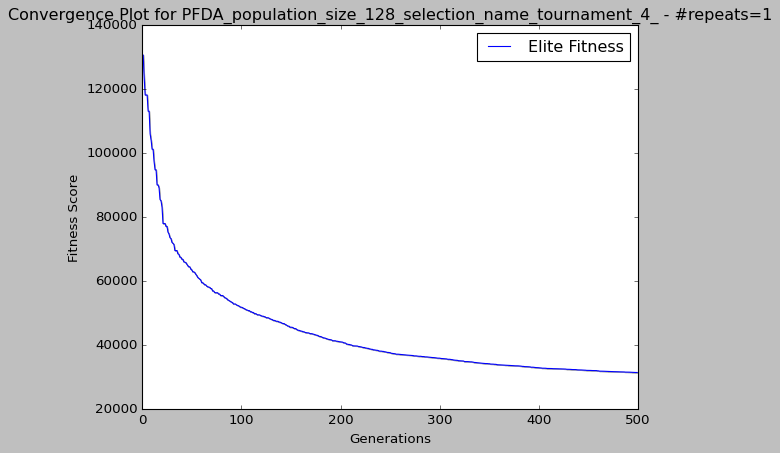

Running new experiment: PFDA_population_size_128_selection_name_tournament_8_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 128
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 135813 avg. fitness: 143105.25
generation: 2 best fitness: 126907 avg. fitness: 135695.6015625
generation: 3 best fitness: 121869 avg. fitness: 129232.5390625
generation: 4 best fitness: 119156 avg. fitness: 124198.320312

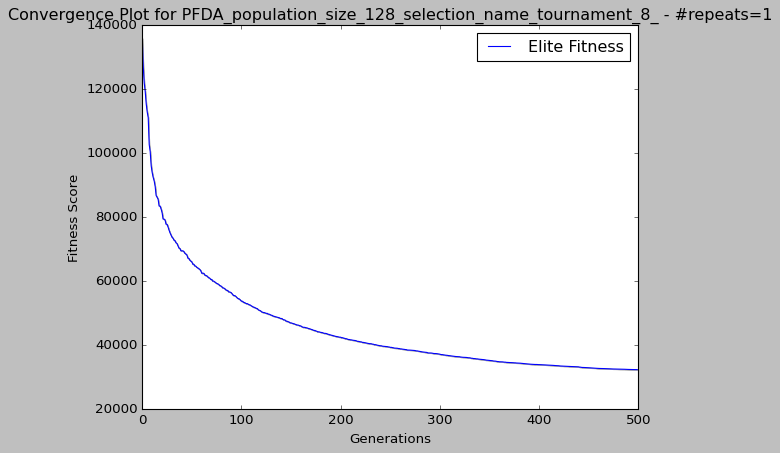

Running new experiment: PFDA_population_size_128_selection_name_tournament_16_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 128
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 135733 avg. fitness: 139896.8203125
generation: 2 best fitness: 124700 avg. fitness: 132320.3359375
generation: 3 best fitness: 118751 avg. fitness: 124350.1484375
generation: 4 best fitness: 114391 avg. fitness: 118681

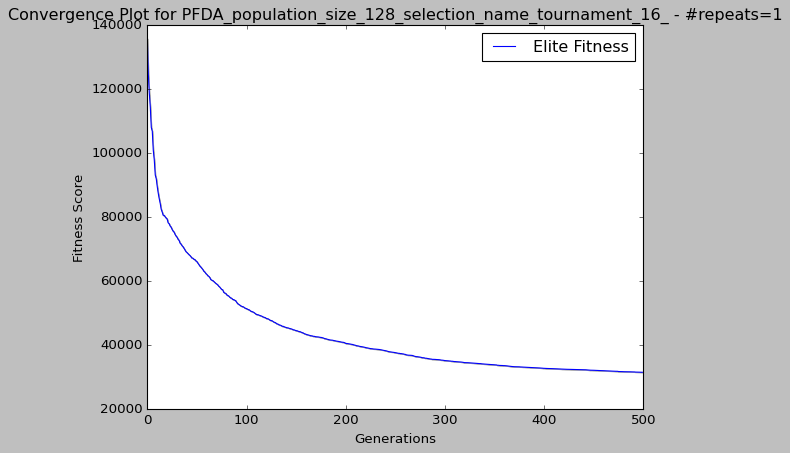

Running new experiment: PFDA_population_size_128_selection_name_tournament_2_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 128
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_2
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 136145 avg. fitness: 148755.9765625
generation: 2 best fitness: 131977 avg. fitness: 145723.296875
generation: 3 best fitness: 131424 avg. fitness: 142424.9375
generation: 4 best fitness: 128066 avg. fitness: 139929.77343

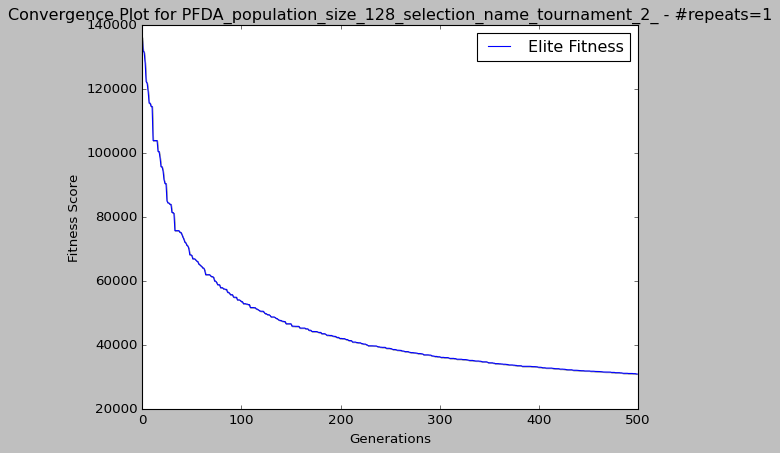

Running new experiment: PFDA_population_size_256_selection_name_tournament_4_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 256
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 129414 avg. fitness: 144777.53125
generation: 2 best fitness: 127726 avg. fitness: 138819.14453125
generation: 3 best fitness: 127726 avg. fitness: 134195.97265625
generation: 4 best fitness: 114597 avg. fitness: 130220.5

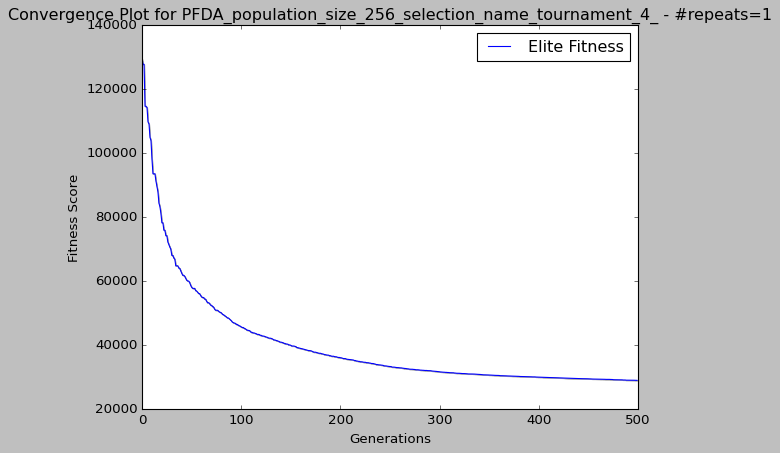

Running new experiment: PFDA_population_size_256_selection_name_tournament_8_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 256
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 130456 avg. fitness: 141796.5625
generation: 2 best fitness: 127514 avg. fitness: 135710.23828125
generation: 3 best fitness: 118006 avg. fitness: 130292.4921875
generation: 4 best fitness: 118006 avg. fitness: 124670.140

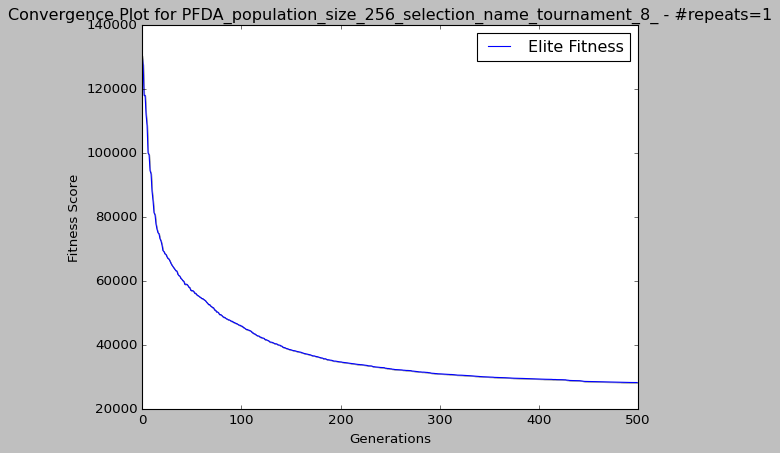

Running new experiment: PFDA_population_size_256_selection_name_tournament_16_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 256
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 129800 avg. fitness: 140026.90625
generation: 2 best fitness: 128856 avg. fitness: 132739.390625
generation: 3 best fitness: 120369 avg. fitness: 127563.1640625
generation: 4 best fitness: 116074 avg. fitness: 121499.89

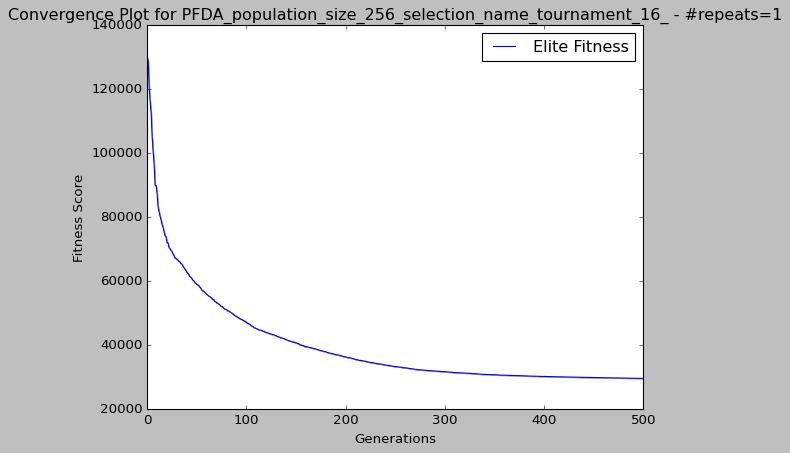

Running new experiment: PFDA_population_size_256_selection_name_tournament_2_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 256
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_2
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 134186 avg. fitness: 148193.4140625
generation: 2 best fitness: 128786 avg. fitness: 145283.1171875
generation: 3 best fitness: 127786 avg. fitness: 142544.1484375
generation: 4 best fitness: 127786 avg. fitness: 140027.2

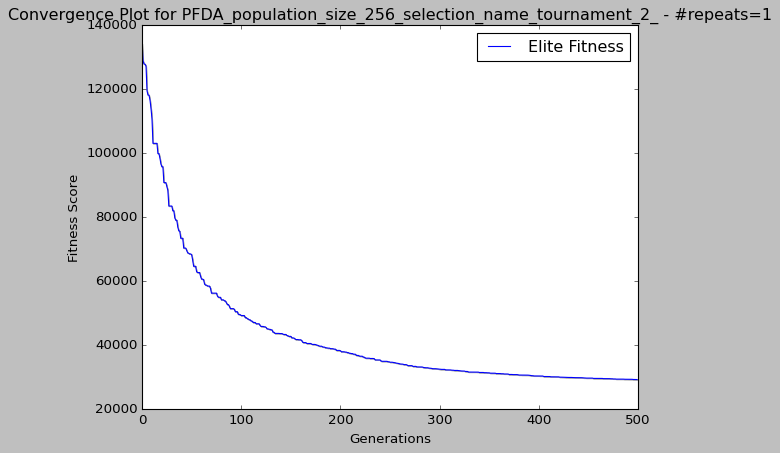

Running new experiment: PFDA_population_size_512_selection_name_tournament_4_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 512
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 130044 avg. fitness: 144183.263671875
generation: 2 best fitness: 127768 avg. fitness: 139379.548828125
generation: 3 best fitness: 116207 avg. fitness: 134730.091796875
generation: 4 best fitness: 116207 avg. fitness: 13

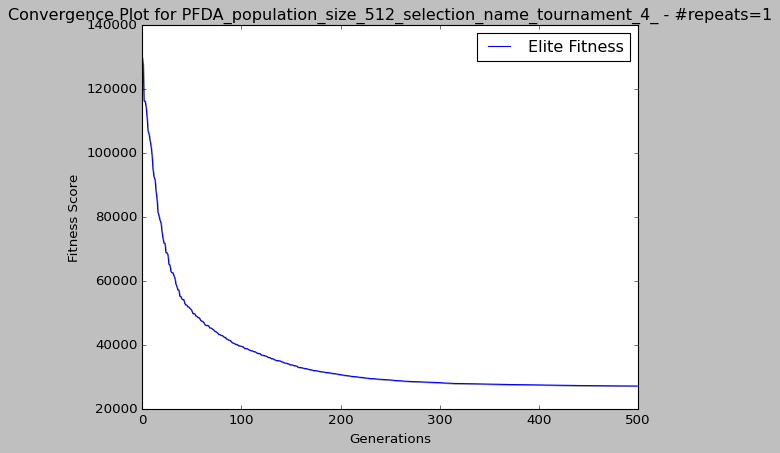

Running new experiment: PFDA_population_size_512_selection_name_tournament_8_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 512
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 129647 avg. fitness: 142153.025390625
generation: 2 best fitness: 127490 avg. fitness: 135365.568359375
generation: 3 best fitness: 122448 avg. fitness: 130170.435546875
generation: 4 best fitness: 119582 avg. fitness: 12

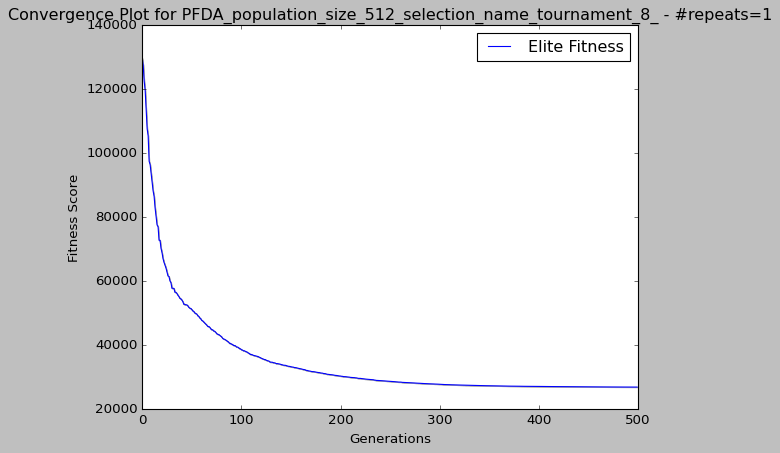

Running new experiment: PFDA_population_size_512_selection_name_tournament_16_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 512
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 128926 avg. fitness: 139634.70703125
generation: 2 best fitness: 123411 avg. fitness: 131986.046875
generation: 3 best fitness: 114417 avg. fitness: 125229.22265625
generation: 4 best fitness: 114346 avg. fitness: 11921

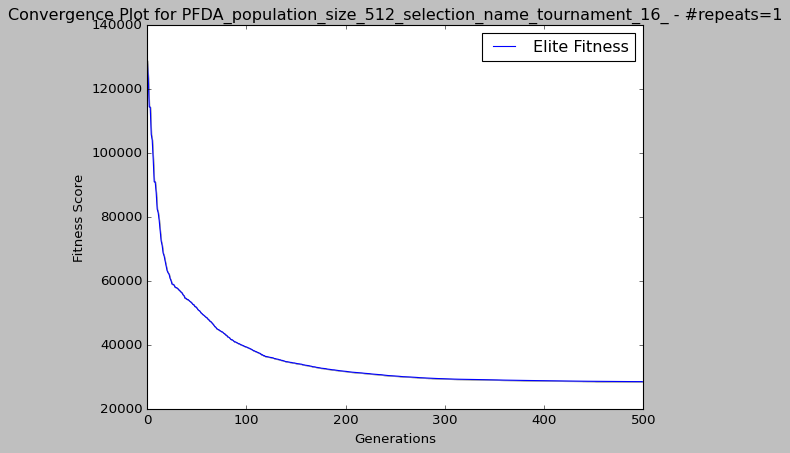

Running new experiment: PFDA_population_size_512_selection_name_tournament_2_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 512
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_2
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 129908 avg. fitness: 147994.5078125
generation: 2 best fitness: 129908 avg. fitness: 144849.01953125
generation: 3 best fitness: 124004 avg. fitness: 141724.533203125
generation: 4 best fitness: 124004 avg. fitness: 13903

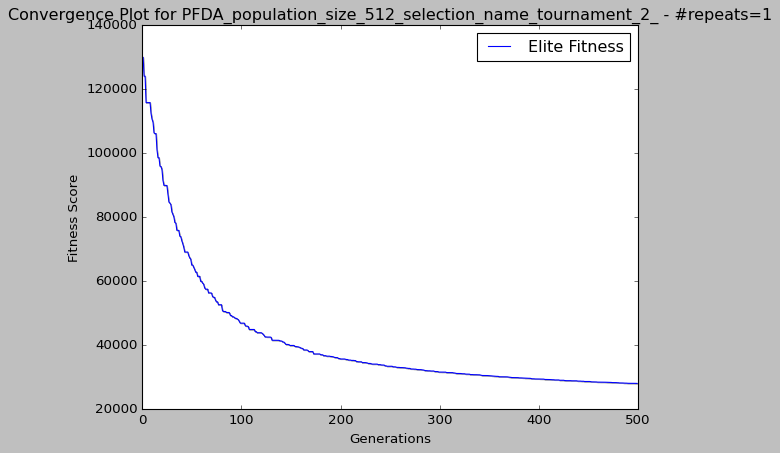

Running new experiment: PFDA_population_size_64_selection_name_tournament_4_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 64
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 135883 avg. fitness: 144620.390625
generation: 2 best fitness: 135883 avg. fitness: 140304.296875
generation: 3 best fitness: 125262 avg. fitness: 136269.265625
generation: 4 best fitness: 125262 avg. fitness: 132933.671875

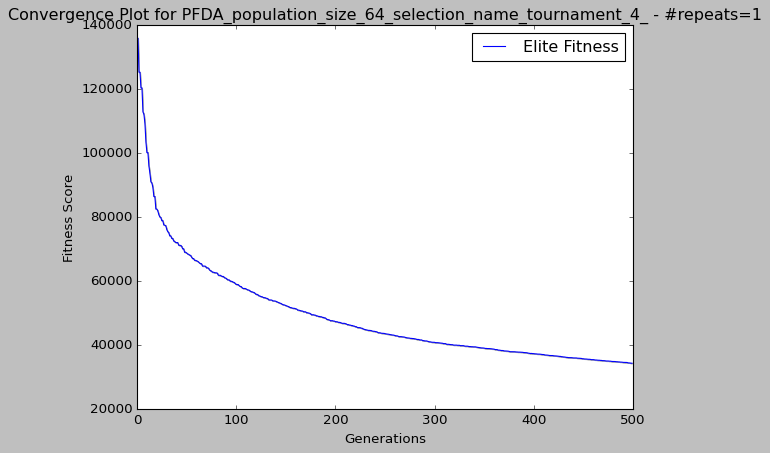

Running new experiment: PFDA_population_size_64_selection_name_tournament_8_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 64
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 137307 avg. fitness: 145576.96875
generation: 2 best fitness: 126356 avg. fitness: 138030.3125
generation: 3 best fitness: 126356 avg. fitness: 130501.84375
generation: 4 best fitness: 125603 avg. fitness: 127171.0
generati

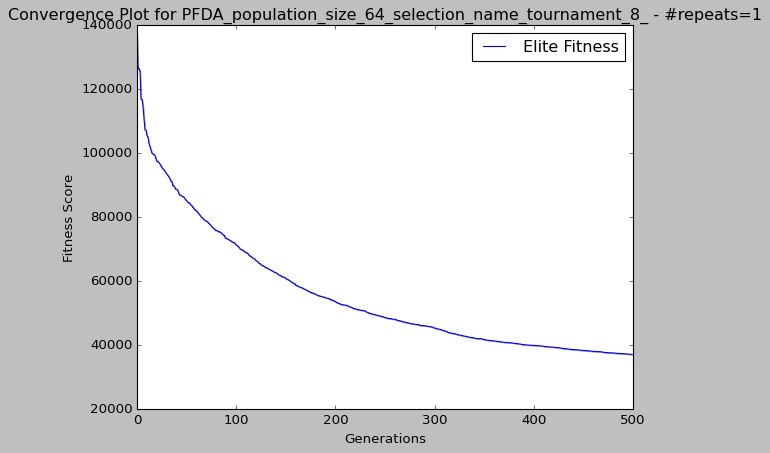

Running new experiment: PFDA_population_size_64_selection_name_tournament_16_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 64
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 134951 avg. fitness: 138791.4375
generation: 2 best fitness: 125057 avg. fitness: 132074.25
generation: 3 best fitness: 124378 avg. fitness: 125543.515625
generation: 4 best fitness: 119265 avg. fitness: 121994.09375
gene

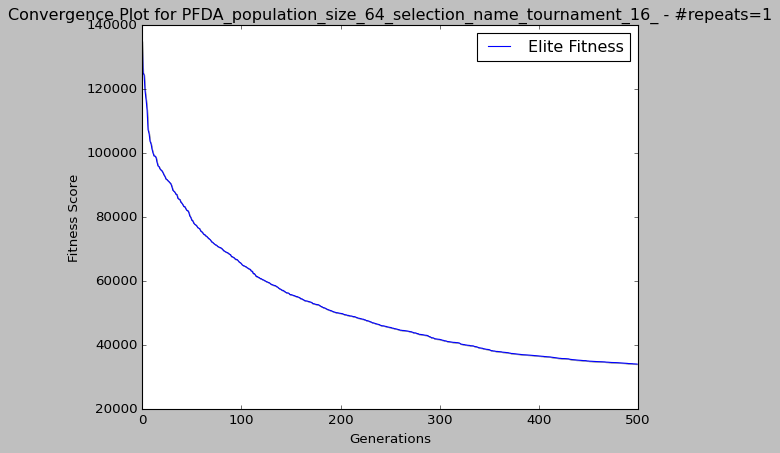

Running new experiment: PFDA_population_size_64_selection_name_tournament_2_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FD903DB07C0>
 - Evolution Type: PFDA_xyrgb
 - Population Size: 64
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.004
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_2
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fd8d57a3400>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 133872 avg. fitness: 148217.40625
generation: 2 best fitness: 133872 avg. fitness: 144892.28125
generation: 3 best fitness: 131727 avg. fitness: 143070.921875
generation: 4 best fitness: 131727 avg. fitness: 140596.46875
ge

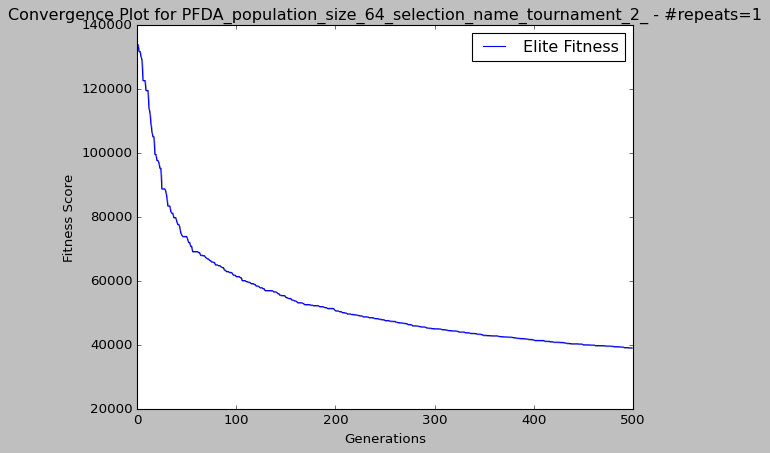

Best hyperparameters found: PFDA_population_size_512_selection_name_tournament_8_ with score 26852.0


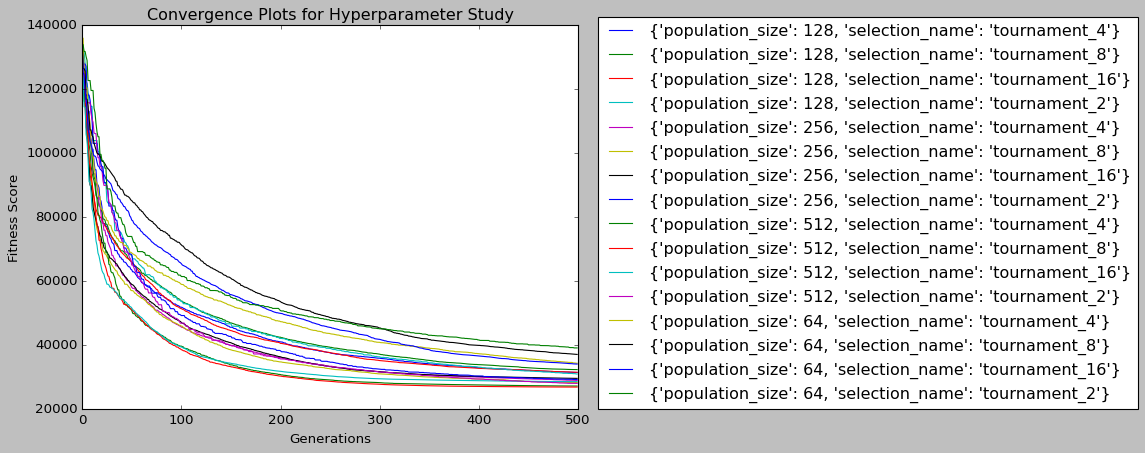

In [6]:
num_points = 100
num_individuals = 300
genome_length = num_points*NUM_VARIABLES_PER_POINT
evo = Evolution(num_points,
                REFERENCE_IMAGE,
                evolution_type="PFDA_xyrgb",
                population_size=num_individuals,
                generation_reporter=reporter,
                mutation_probability=2/genome_length,       # probably better
                #num_features_mutation_strength_decay=0.004,  # unsure
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=500,
                num_features_mutation_strength=.25,
                selection_name='tournament_4',
                verbose=verbose_output)

experiment_pfda = Experiment("PFDA", evo)

params = {
    'population_size': [128, 256, 512, 64],
    'selection_name': ['tournament_4', 'tournament_8', 'tournament_16', 'tournament_2']
}

data = experiment_pfda.hyperparameter_search(params, repeats=1, plot_converge=True, plot=True)